# Machine Learning Methods

Import the libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D

----
## Automatic classification

### Get the data
You can get the data from a file or use the [dataset library](https://scikit-learn.org/stable/datasets.html).

In [ ]:
# Get data from csv file
iris_file = pd.read_csv('./datasets/iris.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
iris_feature_names = iris.columns.values.tolist()[:4]
iris_data = iris[iris_feature_names]
iris_target = iris[iris.columns.values.tolist()[4]]
iris_target_names = list(set(iris_target))

print('Features:',iris_feature_names, '   Classes:', iris_target_names)


In [ ]:
# Alternative dataset source. Import datasets library
from sklearn import datasets

# Prepare the data from datasets library
iris = datasets.load_iris()

# Prepare the data
iris_feature_names = iris.feature_names
iris_target_names = iris.target_names
iris_data = iris.data
iris_target = iris.target

print(iris_feature_names, iris_target_names)

----
#### Build the model and evaluate it
Decision trees, Naive bayes and KNN

Learn more about cross-validation: https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

In [ ]:
# Import the classifiers
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier. You can try distinct hyperparameters
# clf = GaussianNB()  # Naive Bayes
# clf = KNeighborsClassifier(n_neighbors=5)
clf = DecisionTreeClassifier(random_state=1234)


# Data selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.33, random_state=27)

# Train the model on the training set
clf_model = clf.fit(X_train, y_train)

# Make predictions on new data
# X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
# prediction = clf_model.predict(X_new)
# print("Prediction:", prediction)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))

Plot Tree with plot_tree

In [ ]:
# If you have created the Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt

print(iris_feature_names)
print(iris_target_names)

fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(clf_model, 
                   feature_names=iris_feature_names,  
                   class_names=iris_target_names,
                   filled=True)

# To save the figure to the .png file use the code
# fig.savefig("decistion_tree.png")

.

.
----
## Clustering with K-Means

Iris clustering example (source: https://drlee.io/mastering-kmeans-with-scikit-learn-the-iris-dataset-as-a-playground-797c017add7e)

Other options: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [ ]:
# Load the dataset
iris = datasets.load_iris()

# Preliminary data exploration
print(iris.data.shape)     # Output: (150, 4)
print(iris.feature_names)  # Output: ['sepal length (cm)', ...]
print(iris.data[:5])

# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris.data)
print(scaled_iris[:5])

### Finding the Optimal Number of Clusters with the Elbow Method

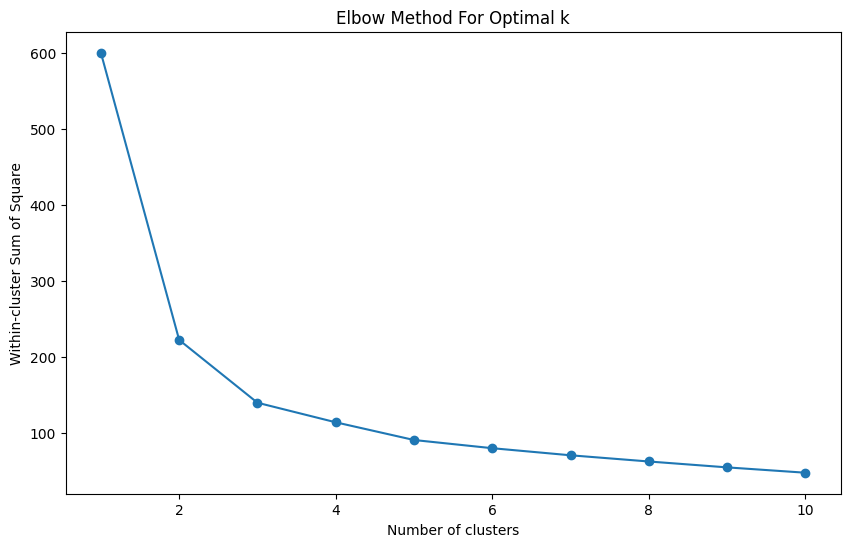

In [122]:
# Calculate the within-cluster sum of square across different cluster counts
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_iris)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

### Clustering and evaluating

In [123]:
# Assuming the elbow is at three clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_iris)

# Evaluating
# print(clusters)

# Adjusting clusters
adj_clusters = [(x + 2) %3 for x in clusters]

print(confusion_matrix(iris.target, adj_clusters))
print(classification_report(iris.target, adj_clusters))

[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### Visualizing the Clusters

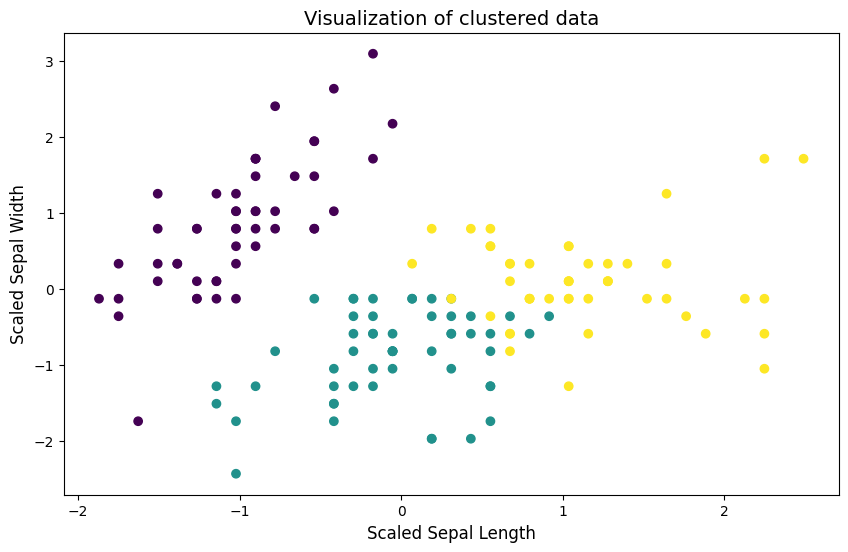

In [124]:
# Choose two dimensions to plot (e.g., sepal length and width)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_iris[:,0], scaled_iris[:,1], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Scaled Sepal Length', fontsize=12)
plt.ylabel('Scaled Sepal Width', fontsize=12)
plt.show()

### Integrating Cluster Labels into the Iris Dataset

In [125]:
# Convert the Iris dataset to a DataFrame for easier manipulation
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the cluster labels as a new column to the DataFrame
iris_df['cluster'] = adj_clusters

# Now let's see the first 5 instances of our new dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


###  3D Visualization of Clusters

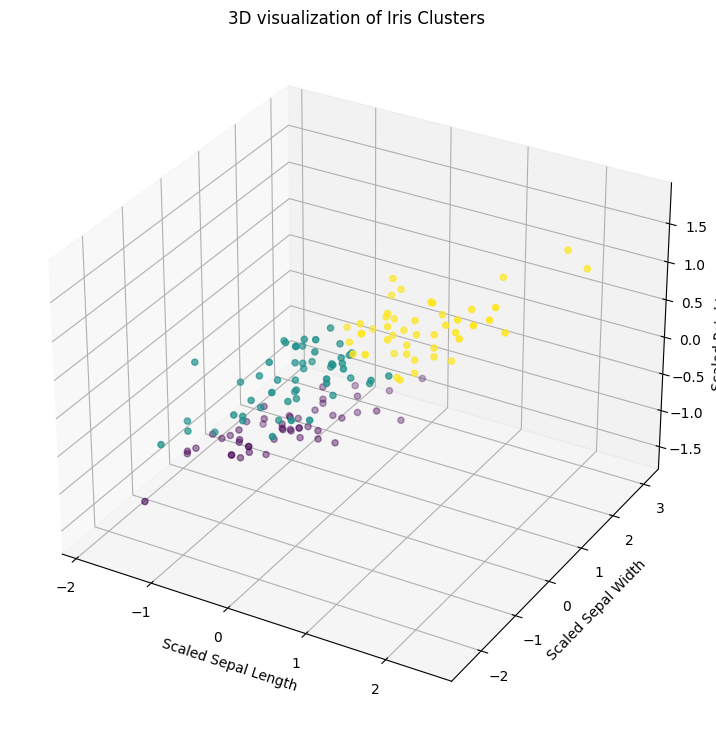

In [127]:
# Assuming you've already completed clustering with KMeans
# clusters = kmeans.fit_predict(scaled_features)

# Create a 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three features of the Iris dataset
ax.scatter(scaled_iris[:,0],  # Sepal length
           scaled_iris[:,1],  # Sepal width
           scaled_iris[:,2],  # Petal length
           c=adj_clusters,            # Use cluster labels as color encoding
           cmap='viridis', 
           marker='o')

# Set labels according to the features we used
ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')

# Title of the plot
ax.set_title('3D visualization of Iris Clusters')

# Show the plot
plt.show()

----
## Association Rules

### Apriori python libraries

**mlxtend**: Implements manny machine learning algorithms and tools, including association rule mining.

**apyori**: Provides functions for manipulating transactional data and for generating association rules and evaluating their quality.

**PyCaret**: Low-code ML library for automating machine learning workflows. It provides a wrapper on top of mlxtend for easy implementation of the Apriori algorithm. Current version (3.2.0) does not support association rules. Find more in https://pycaret.org/. 

----
### Using the MLXTEND library
Source: https://medium.com/codex/what-is-association-rule-learning-abd4a76144d8

In [128]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

# Read the file
medical_exams = pd.read_excel('./datasets/medical_exams.xlsx',sheet_name='Sheet1')

# To remove missing values: raw_data.dropna(inplace=True)
# To filter qty > 0:        raw_data = raw_data[raw_data["quantity"] > 0]
# To remove end characters: raw_data["product_name"] = raw_data["product_name"].str.replace(r' - .*$', '')
medical_exams.head()

,RequestID,ExamID,ExamName,ExamTypeID,ExamType
0,45,1,Allergology,1,Clinical Analysis
1,68,1,Allergology,1,Clinical Analysis
2,80,1,Allergology,1,Clinical Analysis
3,143,1,Allergology,1,Clinical Analysis
4,149,1,Allergology,1,Clinical Analysis


### Pivot table 
For using the apriori algorithm we need to pivot the table.

If the product is in the invoice, the intersection cell will be “True”. If is not, it will be “False”.

In [129]:
# Group
ds_grouped = medical_exams.groupby(['RequestID', 'ExamID'], as_index=False).agg({'ExamName':'count'})
ds_grouped.head(100)

# Create apriori data structure
ds_pivot = pd.pivot(data=ds_grouped, index='RequestID', columns='ExamID',
                                    values='ExamName').fillna(0).applymap(lambda x: True if x > 0 else False)
ds_pivot.tail(5)

ExamID,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
RequestID,,,,,,,,,,,,,,,,,,,,,
10640,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
10642,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10643,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10644,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Learning Rules (Association Rule Learning)



In [131]:
# Get the rules
min_support=0.01
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)    
rules = association_rules(freq_itemsets, metric="support", min_threshold=min_support)    
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(13),(7),0.290868,0.360955,0.219091,0.753230,2.086772,0.114100,2.589640
1,(7),(13),0.360955,0.290868,0.219091,0.606976,2.086772,0.114100,1.804295
2,(64),(7),0.042371,0.360955,0.034386,0.811530,2.248289,0.019091,3.390700
3,(7),(64),0.360955,0.042371,0.034386,0.095263,2.248289,0.019091,1.058461
4,(66),(7),0.056840,0.360955,0.034761,0.611570,1.694314,0.014245,1.645202


### Utility functions

In [144]:
# Function for getting the product names by using product id
def get_item_name(medical_exams, exams):
    if type(exams) != list:
        exam_name = medical_exams[medical_exams["ExamID"] == exams]["ExamName"].values[0]
        return exam_name
    else:
        exam_names = [medical_exams[medical_exams["ExamID"] == exams]["ExamName"].values[0] for exams in exams]
        return exam_names

# ———————————————————————————————
# Function to get the recommended products related to a specific product
def get_golden_shot(target_id, dataframe, rules, rec_count):
    target_exam = get_item_name(dataframe,target_id)
    recomended_exam_ids = recommend_items(rules, target_id, rec_count)
    recomended_exam_names = get_item_name(dataframe,recommend_items(rules, target_id, rec_count))
    print(f'\nTarget Exam ID (which is in the cart): {target_id}   Exam Name: {target_exam}')
    print(f'Recommended Exams: {recomended_exam_ids}\nExam Names: {recomended_exam_names}')

# ———————————————————————————————
# Function for simulating the recommendation process
def recommend_items(rules_df, exam_id, rec_count):
    sorted_rules = rules_df.sort_values('lift', ascending=False) 
    # we are sorting the rules dataframe by using "lift" metric
    recommended_exams = [] 

    for i, exam in sorted_rules["antecedents"].items(): 
        for j in list(exam):  
            if j == exam_id:  
                recommended_exams.append(
                    list(sorted_rules.iloc[i]["consequents"]))
      
    recommended_exams = list({item for item_list in recommended_exams for item in item_list}) 
    recommended_exams.remove(exam_id)
    return recommended_exams[:rec_count]



In [145]:
# Get the recommended exams
get_golden_shot(7, medical_exams,rules, 10)
get_golden_shot(64, medical_exams,rules, 10)



Target Exam ID (which is in the cart): 7   Exam Name: Hematology
Recommended Exams: [64, 66, 72]
Exam Names: ['Exercise Echocardiography', 'ECG with Stress Testing', 'Audiometry']

Target Exam ID (which is in the cart): 64   Exam Name: Exercise Echocardiography
Recommended Exams: [66, 13, 7]
Exam Names: ['ECG with Stress Testing', 'Urine', 'Hematology']
